In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from modules.training_and_fine_tuning.training.train_cnn_model_using_feature_statistics import CnnModelUsingFeatureStatistics
from modules.training_and_fine_tuning.utils.feature_statistics_data_utils import DataUtils
from config.vi_config import VietnameseDatasetConfig
from modules.training_and_fine_tuning.utils.model_utils import ModelUtilities

In [25]:
def get_n_mfcc_paths(n_mfcc, Config):
    train_path = Config.n_mfcc_config[n_mfcc].train_path
    validation_path = Config.n_mfcc_config[n_mfcc].validation_path
    test_path = Config.n_mfcc_config[n_mfcc].test_path
    return train_path, validation_path, test_path

In [26]:
n_mfcc = 26
train_file_path, val_file_path, test_file_path = get_n_mfcc_paths(n_mfcc, VietnameseDatasetConfig)
print(train_file_path, test_file_path, val_file_path )
x_traincnn, y_train, x_valcnn, y_val, scaler = DataUtils.prepare_data_for_train_model(train_file_path, val_file_path)

D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/train.csv D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/test.csv D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/validation.csv


In [27]:
import joblib
def save_scaler(scaler):
    joblib.dump(scaler, 'models/best_fine_tuned_scaler.pkl')

save_scaler(scaler)

In [28]:
x_traincnn.shape

(1482, 307, 1)

In [29]:
y_train.shape

(1482, 7)

In [30]:
x_valcnn.shape

(429, 307, 1)

In [31]:
y_val.shape

(429, 7)

In [32]:
cnn_model_statistics = ModelUtilities.load_model(f'models/best_model_E5.3.keras')

In [33]:
num_layers_to_unfreeze = 2

for layer in cnn_model_statistics.layers:
    layer.trainable = False

for layer in cnn_model_statistics.layers[-num_layers_to_unfreeze:]:
    layer.trainable = True

In [34]:
cnn_model_statistics.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
cnn_model_statistics.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 307, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 307, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 307, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 307, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 154, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 154, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 154, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 154, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 154, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 154, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 77, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 77, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,261,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,352,967 (5.16 MB)

 Trainable params: 1,799 (7.03 KB)

 Non-trainable params: 1,351,168 (5.15 MB)

In [36]:
import numpy as np
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

y_train_flat = np.array(y_train).flatten()

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_flat),
    y=y_train_flat
)

class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

model_checkpoint = ModelCheckpoint(
    'models/best_fine_tuned_model.keras', 
    monitor='val_accuracy', 
    save_best_only=True
)
early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max', 
    patience=30, 
    restore_best_weights=True
)
lr_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', 
    patience=10, 
    verbose=1, 
    factor=0.7, 
    min_lr=1e-6
)

history = cnn_model_statistics.fit(
    x_traincnn, 
    y_train, 
    epochs=200, 
    validation_data=(x_valcnn, y_val), 
    batch_size=16, 
    callbacks=[model_checkpoint, early_stop, lr_reduction]
)

Epoch 1/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3335 - loss: 2.4456 - val_accuracy: 0.3986 - val_loss: 1.8009 - learning_rate: 1.0000e-04
Epoch 2/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3316 - loss: 2.3532 - val_accuracy: 0.4196 - val_loss: 1.7041 - learning_rate: 1.0000e-04
Epoch 3/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3370 - loss: 2.3046 - val_accuracy: 0.4312 - val_loss: 1.6199 - learning_rate: 1.0000e-04
Epoch 4/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3861 - loss: 2.0988 - val_accuracy: 0.4382 - val_loss: 1.5457 - learning_rate: 1.0000e-04
Epoch 5/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3796 - loss: 1.9856 - val_accuracy: 0.4522 - val_loss: 1.4760 - learning_rate: 1.0000e-04
Epoch 6/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4152 - loss: 1.9272 - val_accuracy: 0.4779 - val_loss: 1.4179 - learning_rate: 1.0000e-04
Epoch 7/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4211 

In [37]:
history_dict = history.history
print(history_dict)

{'accuracy': [0.3427800238132477, 0.3556005358695984, 0.3454790711402893, 0.38529014587402344, 0.3832658529281616, 0.4075573682785034, 0.43387314677238464, 0.4439946115016937, 0.4399460256099701, 0.4635627567768097, 0.4676113426685333, 0.49595141410827637, 0.5094466805458069, 0.5121457576751709, 0.5242915153503418, 0.5411605834960938, 0.5377867817878723, 0.5647773146629333, 0.5647773146629333, 0.5877193212509155, 0.571524977684021, 0.5823211669921875, 0.601214587688446, 0.6052631735801697, 0.623481810092926, 0.6167341470718384, 0.6133603453636169, 0.6363022923469543, 0.6322537064552307, 0.647773265838623, 0.640350878238678, 0.6524966359138489, 0.6545209288597107, 0.6653171181678772, 0.662618100643158, 0.6551956534385681, 0.6653171181678772, 0.6545209288597107, 0.6349527835845947, 0.670040488243103, 0.672739565372467, 0.6774628758430481, 0.6707152724266052, 0.6997300982475281, 0.6713899970054626, 0.672739565372467, 0.6882591247558594, 0.6801619529724121, 0.6983805894851685, 0.7024291753

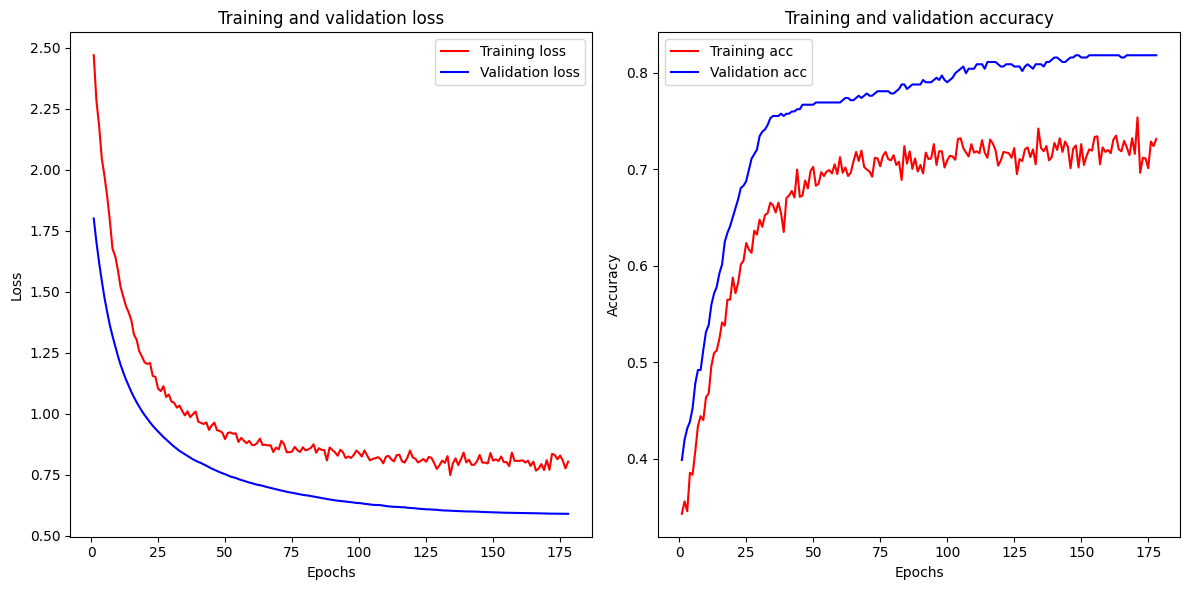

In [38]:
ModelUtilities.plot_training_history(history_dict)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


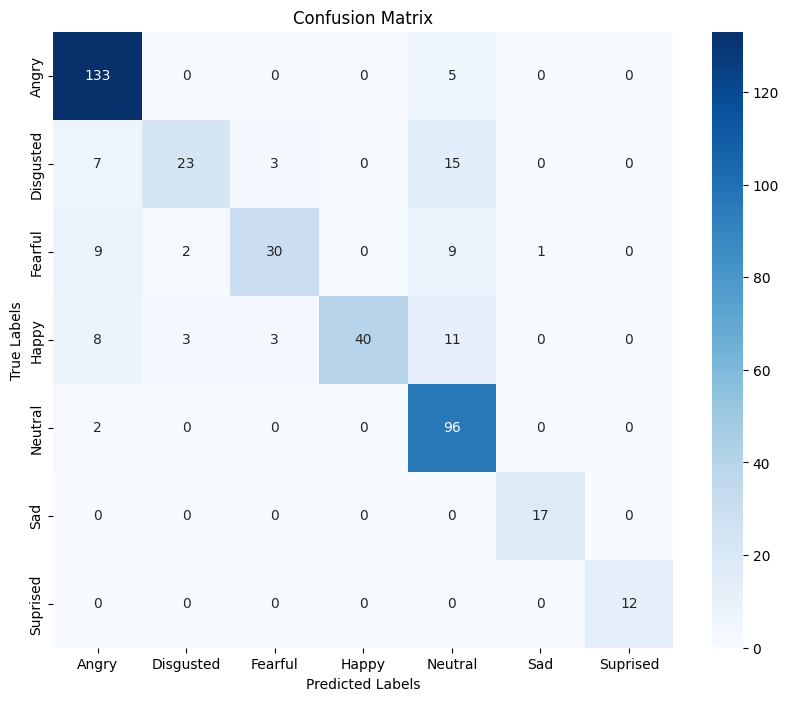

In [39]:
ModelUtilities.plot_confusion_matrix(cnn_model_statistics, x_valcnn, y_val, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


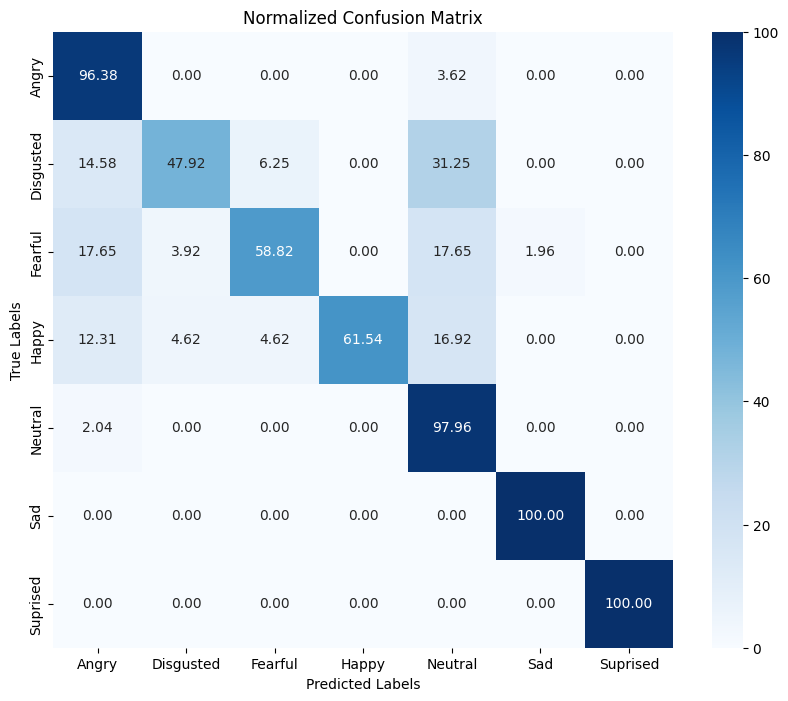

In [40]:
ModelUtilities.plot_confusion_matrix_normalized(cnn_model_statistics, x_valcnn, y_val, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

In [41]:
x_testcnn, y_test = DataUtils.prepare_data_for_test_model(test_file_path, scaler)

In [42]:
x_testcnn.shape

(281, 307, 1)

In [43]:
y_test.shape

(281, 7)

In [44]:
loss, accuracy = cnn_model_statistics.evaluate(x_testcnn, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8670 - loss: 0.4652 
Test Loss: 0.513516366481781, Test Accuracy: 0.8612099885940552


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


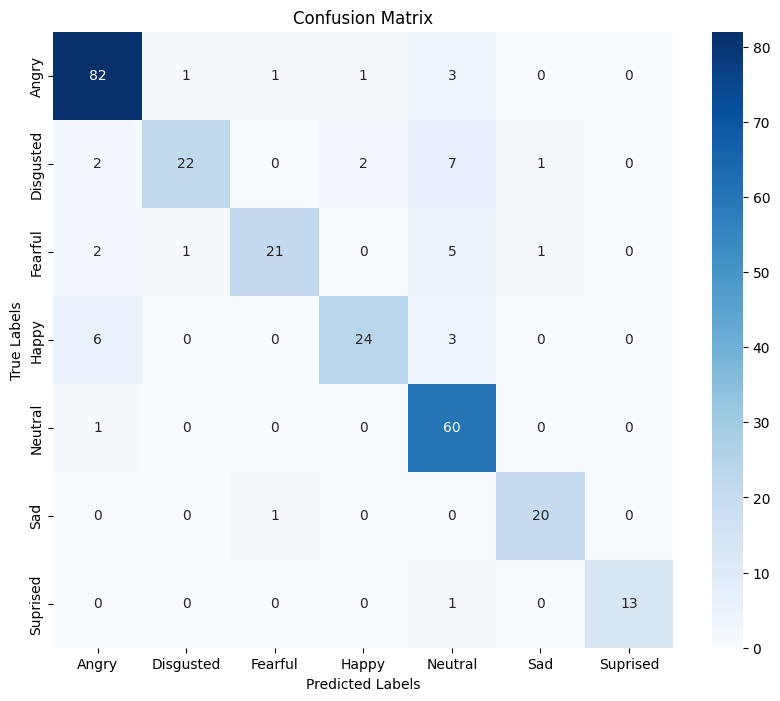

In [45]:
ModelUtilities.plot_confusion_matrix(cnn_model_statistics, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


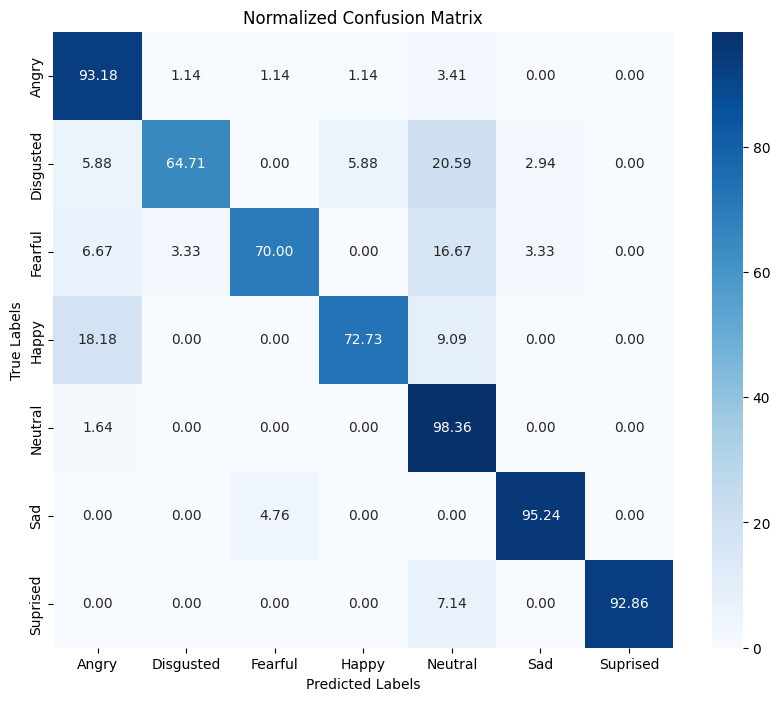

In [46]:
ModelUtilities.plot_confusion_matrix_normalized(cnn_model_statistics, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])